# General EDA

## Import libraries

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('kc_house_data.csv', index_col='id')

In [7]:
df.shape

(21613, 20)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Let's drop redundant columns sqft_living and lot

In [9]:
df.drop(columns= ['sqft_living15','sqft_lot15'],inplace=True)

### Drop sqft_above
as it's highly coorelated with sqft in general

In [10]:
#create new binary column for has floors 
df.drop(columns='sqft_above', inplace=True)

### Fix up date

In [11]:
df.date =df.date.apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:8])
df.date =pd.to_datetime(df.date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_basement  21613 non-null  int64         
 12  yr_built       21613 non-null  int64         
 13  yr_renovated   21613 non-null  int64         
 14  zipcode        21613 non-null  int64         
 15  lat  

### Check for NaN values

In [13]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

## Get dummies for catagorical data

### Make catagorical var for has_basement

In [14]:
#create new binary column for has basement 
df.has_base = 0
# if the sqft_basement>0 case has_base to 1
df.has_base = df.sqft_basement.apply(lambda x: 1 if x>0 else 0)

In [15]:
df.has_base.value_counts()

0    13126
1     8487
Name: sqft_basement, dtype: int64

### Turn Zipcode into Catagorical

In [16]:
df = df.join(pd.get_dummies(df.zipcode, prefix='catagorical'))
df.drop(columns='zipcode',inplace=True)

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,catagorical_98146,catagorical_98148,catagorical_98155,catagorical_98166,catagorical_98168,catagorical_98177,catagorical_98178,catagorical_98188,catagorical_98198,catagorical_98199
id,,,,,,,,,,,,,,,,,,,,,
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,4,...,0,0,0,1,0,0,0,0,0,0


### Let's use yr_renovated and update the 'yr_built' to the last renovation
This may give us a better sense of the style of the house in regards to age

In [18]:
# df.yr_renovated.value_counts().index
# plt.figure(figsize=(20,20))
# sns.barplot(x=df.yr_renovated.value_counts().index, y=df.yr_renovated.value_counts().values)

In [19]:
# df.yr_built.value_counts()

In [20]:
# plt.figure(figsize=(20,20))
# plt.xticks(rotation='vertical')
# sns.barplot(x=df.yr_built.value_counts().index, y=df.yr_built.value_counts().values)

In [21]:
def reno_yr(reno, built):
    if reno:
        return reno
    return built

In [22]:
#update year built to the last renovation (if there was one)
df.yr_built = df.apply(lambda x: reno_yr(x.yr_renovated, x.yr_built), axis=1)


In [23]:
# df.yr_built.value_counts()

In [24]:
# plt.figure(figsize=(20,20))
# plt.xticks(rotation='vertical')
# sns.barplot(x=df.yr_built.value_counts().index, y=df.yr_built.value_counts().values)

#### Now lets drop yr_renovated 

In [25]:
df.drop(columns='yr_renovated', inplace=True)

## Look at Distributions

In [26]:
price_predictors = df.iloc[:,2:13]

In [27]:
price_predictors.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built'],
      dtype='object')

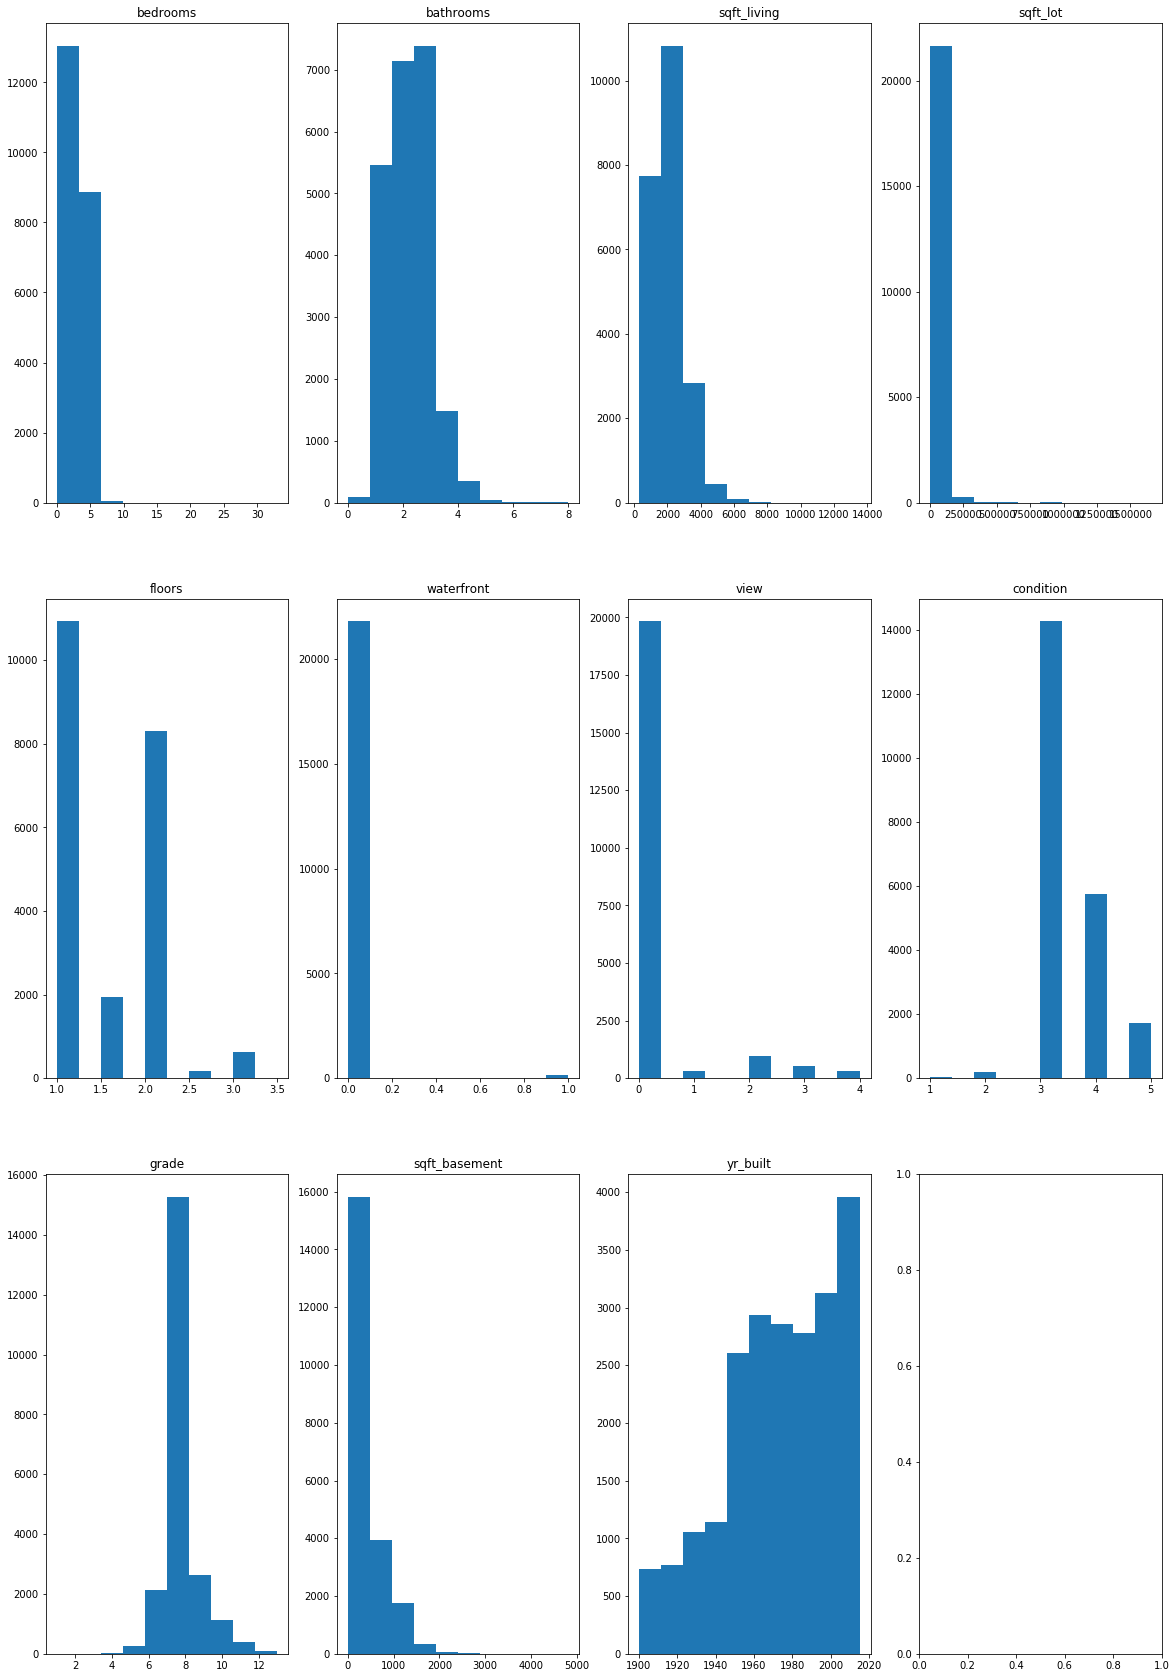

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,30))
# fig.suptitle('Graphs of Feature Distributions')
# n =1 #used for iteration below, DONT NEED IF USING np.ravel

# for row in range(3):
#     for col in range(4):
# to avoid row col nonsense  use below
list_of_subplots = np.ravel(axes)

for index,col in enumerate(price_predictors.columns):
# ax = axes[row][col]
# y = [n*xi for xi in x]
    list_of_subplots[index].hist(price_predictors[col])
    list_of_subplots[index].set_title('{}'.format(col))
fig.savefig('dist_of_features')    #saves fig in current folder

## Look at correlation

In [29]:
price_predictors = df.iloc[:,2:13]
corr = price_predictors.corr()

### Function to color corr dataframe

In [30]:
# color green if above .7 coor and red if above -.7 corr
def color(val):
    if abs(val)>+.7:
        color = 'green'
        return 'color: %s' % color
    elif val<0:
        color ='red'
        return 'color: %s' % color 
    else:
        color ='black'
        return 'color: %s' % color

In [31]:
price_predictors.bathrooms.value_counts()

2.50    5430
1.00    3968
1.75    3104
2.25    2079
2.00    1964
1.50    1478
2.75    1191
3.00     765
3.50     735
3.25     595
3.75     155
4.00     140
4.50     102
4.25      79
0.75      74
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
6.75       2
6.50       2
8.00       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [32]:
s = corr.style.applymap(color)
s

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built
bedrooms,1.000000,0.514159,0.575041,0.031679,0.175879,-0.006382,0.079519,0.029655,0.354189,0.303222,0.166522
bathrooms,0.514159,1.000000,0.755160,0.088924,0.502218,0.063759,0.189804,-0.119138,0.665533,0.284275,0.538495
sqft_living,0.575041,0.755160,1.000000,0.174546,0.356090,0.103648,0.286298,-0.054219,0.763293,0.436301,0.346751
sqft_lot,0.031679,0.088924,0.174546,1.000000,-0.003721,0.021667,0.074117,-0.008255,0.115752,0.015649,0.054220
floors,0.175879,0.502218,0.356090,-0.003721,1.000000,0.024137,0.031867,-0.258151,0.459584,-0.244948,0.506158
waterfront,-0.006382,0.063759,0.103648,0.021667,0.024137,1.000000,0.399552,0.016753,0.082636,0.080098,0.000085
view,0.079519,0.189804,0.286298,0.074117,0.031867,0.399552,1.000000,0.047865,0.254106,0.277867,-0.014781
condition,0.029655,-0.119138,-0.054219,-0.008255,-0.258151,0.016753,0.047865,1.000000,-0.137275,0.173494,-0.388381
grade,0.354189,0.665533,0.763293,0.115752,0.459584,0.082636,0.254106,-0.137275,1.000000,0.171130,0.463931
sqft_basement,0.303222,0.284275,0.436301,0.015649,-0.244948,0.080098,0.277867,0.173494,0.171130,1.000000,-0.099798


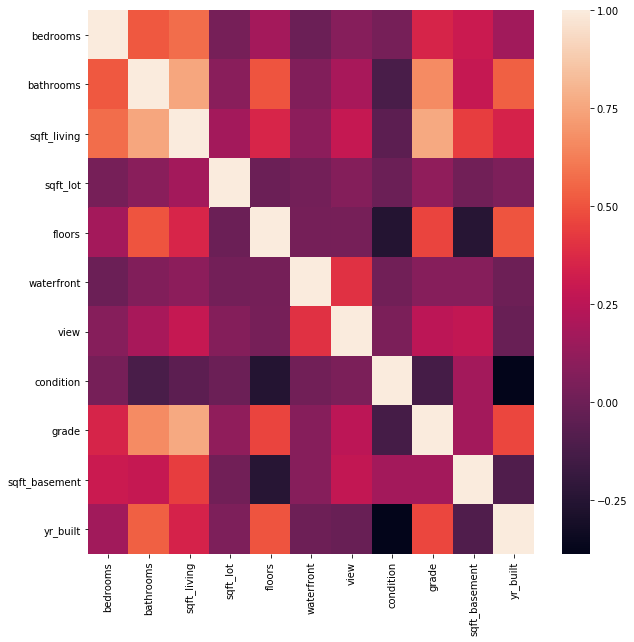

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

## Run prliminary OLS

In [34]:
ols_features =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'catagorical_98001',
       'catagorical_98002', 'catagorical_98003', 'catagorical_98004',
       'catagorical_98005', 'catagorical_98006', 'catagorical_98007',
       'catagorical_98008', 'catagorical_98010', 'catagorical_98011',
       'catagorical_98014', 'catagorical_98019', 'catagorical_98022',
       'catagorical_98023', 'catagorical_98024', 'catagorical_98027',
       'catagorical_98028', 'catagorical_98029', 'catagorical_98030',
       'catagorical_98031', 'catagorical_98032', 'catagorical_98033',
       'catagorical_98034', 'catagorical_98038', 'catagorical_98039',
       'catagorical_98040', 'catagorical_98042', 'catagorical_98045',
       'catagorical_98052', 'catagorical_98053', 'catagorical_98055',
       'catagorical_98056', 'catagorical_98058', 'catagorical_98059',
       'catagorical_98065', 'catagorical_98070', 'catagorical_98072',
       'catagorical_98074', 'catagorical_98075', 'catagorical_98077',
       'catagorical_98092', 'catagorical_98102', 'catagorical_98103',
       'catagorical_98105', 'catagorical_98106', 'catagorical_98107',
       'catagorical_98108', 'catagorical_98109', 'catagorical_98112',
       'catagorical_98115', 'catagorical_98116', 'catagorical_98117',
       'catagorical_98118', 'catagorical_98119', 'catagorical_98122',
       'catagorical_98125', 'catagorical_98126', 'catagorical_98133',
       'catagorical_98136', 'catagorical_98144', 'catagorical_98146',
       'catagorical_98148', 'catagorical_98155', 'catagorical_98166',
       'catagorical_98168', 'catagorical_98177', 'catagorical_98178',
       'catagorical_98188', 'catagorical_98198', 'catagorical_98199']

In [35]:
for i in ols_features:
    print(df[i].value_counts())


3     10012
4      6948
2      2808
5      1631
6       286
1       209
7        38
8        13
0        13
9         6
10        3
11        1
33        1
Name: bedrooms, dtype: int64
2.50    5430
1.00    3968
1.75    3104
2.25    2079
2.00    1964
1.50    1478
2.75    1191
3.00     765
3.50     735
3.25     595
3.75     155
4.00     140
4.50     102
4.25      79
0.75      74
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
6.75       2
6.50       2
8.00       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
1300    142
1400    141
1010    139
1440    133
1800    131
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64
5000     364
6000     298
4000     255
7200     224
4800     124
        ... 
10946      1
8899       1
6852       1
9976       1
36862      1
Name: sqft_lot, Length: 9782, dtype: int64
1.0    10924
2.0     8305
1.5  

I'm removing lat and long since we already have a view and zipcode column
This will reduce multicolinearity 

In [36]:
ols_formula ='price~'+'+'.join(ols_features)

In [37]:
simple_reg = ols(formula=ols_formula,data=df).fit()
simple_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1139.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:00:22   Log-Likelihood:            -2.9460e+05
No. Observations:               21969   AIC:                         5.894e+05
Df Residuals:                   21888   BIC:                         5.900e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.677e+05   1.18e+05      4.799      0.000    3.36e+05       8e+05
bedrooms          -2.623e+04   1520.028    -17.255      0.000   -2.92e+04   -2.32e+04
bathrooms          1.968e+04   2611.643      7.537      0.000    1.46e+04    2.48e+04
sqft_living         217.0604      2.794     77.699      0.000     211.585     222.536
sqft_lot              0.1957      0.029      6.702      0.000       0.138       0.253
floors            -5.199e+04   3131.814    -16.600      0.000   -5.81e+04   -4.58e+04
waterfront          6.65e+05   1.41e+04     47.025      0.000    6.37e+05    6.93e+05
view               5.812e+04   1721.010     33.772      0.000    5.47e+04    6.15e+04
condition          2.458e+04   1913.800     12.844      0.000    2.08e+04    2.83e+04
grade              5.515e+04   1737.857     31.736      0.000    5.17e+04    5.86e+04
sqft_basement       -82.4845      3.607    -22.870      0.000     -89.554     -75.415
yr_built           -432.4174     61.926     -6.983      0.000    -553.798    -311.037
catagorical_98001  -1.98e+05   8742.688    -22.650      0.000   -2.15e+05   -1.81e+05
catagorical_98002 -1.684e+05   1.15e+04    -14.597      0.000   -1.91e+05   -1.46e+05
catagorical_98003 -2.124e+05   9722.074    -21.844      0.000   -2.31e+05   -1.93e+05
catagorical_98004  5.927e+05   9274.349     63.911      0.000    5.75e+05    6.11e+05
catagorical_98005  1.104e+05   1.26e+04      8.784      0.000    8.58e+04    1.35e+05
catagorical_98006  7.667e+04   7598.855     10.089      0.000    6.18e+04    9.16e+04
catagorical_98007  5.074e+04   1.34e+04      3.774      0.000    2.44e+04    7.71e+04
catagorical_98008  5.534e+04   9798.430      5.648      0.000    3.61e+04    7.46e+04
catagorical_98010 -1.288e+05   1.61e+04     -7.985      0.000    -1.6e+05   -9.71e+04
catagorical_98011 -7.077e+04   1.16e+04     -6.090      0.000   -9.36e+04    -4.8e+04
catagorical_98014 -1.009e+05   1.46e+04     -6.888      0.000    -1.3e+05   -7.22e+04
catagorical_98019 -1.072e+05    1.2e+04     -8.965      0.000   -1.31e+05   -8.38e+04
catagorical_98022   -2.1e+05    1.1e+04    -19.059      0.000   -2.32e+05   -1.88e+05
catagorical_98023 -2.287e+05   7509.674    -30.456      0.000   -2.43e+05   -2.14e+05
catagorical_98024 -3.734e+04   1.78e+04     -2.092      0.036   -7.23e+04   -2357.942
catagorical_98027  -2.66e+04   8260.746     -3.220      0.001   -4.28e+04   -1.04e+04
catagorical_98028 -7.346e+04   9737.245     -7.545      0.000   -9.25e+04   -5.44e+04
catagorical_98029  1.536e+04   9287.341      1.654      0.098   -2839.105    3.36e+04
catagorical_98030 -1.906e+05   1.02e+04    -18.660      0.000   -2.11e+05   -1.71e+05
catagorical_98031 -1.818e+05   9941.343    -18.290      0.000   -2.01e+05   -1.62e+05
catagorical_98032 -1.892e+05   1.42e+04    -13.283      0.000   -2.17e+05

# Make all this with train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df[ols_features], df['price'], test_size=0.33, random_state=42)

In [40]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,catagorical_98146,catagorical_98148,catagorical_98155,catagorical_98166,catagorical_98168,catagorical_98177,catagorical_98178,catagorical_98188,catagorical_98198,catagorical_98199
id,,,,,,,,,,,,,,,,,,,,,
9834200925,3,2.25,1340,4080,1.5,0,0,3,6,170,...,0,0,0,0,0,0,0,0,0,0
3955800080,5,1.50,1890,10880,1.0,0,0,3,7,0,...,0,0,0,0,0,0,0,0,0,0
724069023,1,1.25,1810,5070,1.5,1,4,4,8,580,...,0,0,0,0,0,0,0,0,0,0
7691800020,4,2.50,2510,4543,2.0,0,0,3,8,0,...,0,0,0,0,0,0,0,0,0,0
5469000140,4,1.75,1590,7920,2.0,0,0,4,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193500140,3,1.75,1800,8000,1.0,0,0,3,8,0,...,0,0,0,0,0,0,0,0,0,0
9541600350,3,2.25,2240,8800,1.0,0,0,5,8,0,...,0,0,0,0,0,0,0,0,0,0
2068000270,5,3.00,3850,14990,1.0,0,0,4,9,1560,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train

id
9834200925     330000.0
3955800080     420000.0
724069023     1247000.0
7691800020     660000.0
5469000140     373000.0
                ...    
4193500140     665000.0
9541600350     831000.0
2068000270    1400000.0
381000110      599950.0
7137950460     272000.0
Name: price, Length: 14719, dtype: float64

In [42]:
pd.concat([X_train, y_train], axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,catagorical_98148,catagorical_98155,catagorical_98166,catagorical_98168,catagorical_98177,catagorical_98178,catagorical_98188,catagorical_98198,catagorical_98199,price
id,,,,,,,,,,,,,,,,,,,,,
9834200925,3,2.25,1340,4080,1.5,0,0,3,6,170,...,0,0,0,0,0,0,0,0,0,330000.0
3955800080,5,1.50,1890,10880,1.0,0,0,3,7,0,...,0,0,0,0,0,0,0,0,0,420000.0
724069023,1,1.25,1810,5070,1.5,1,4,4,8,580,...,0,0,0,0,0,0,0,0,0,1247000.0
7691800020,4,2.50,2510,4543,2.0,0,0,3,8,0,...,0,0,0,0,0,0,0,0,0,660000.0
5469000140,4,1.75,1590,7920,2.0,0,0,4,7,0,...,0,0,0,0,0,0,0,0,0,373000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193500140,3,1.75,1800,8000,1.0,0,0,3,8,0,...,0,0,0,0,0,0,0,0,0,665000.0
9541600350,3,2.25,2240,8800,1.0,0,0,5,8,0,...,0,0,0,0,0,0,0,0,0,831000.0
2068000270,5,3.00,3850,14990,1.0,0,0,4,9,1560,...,0,0,0,0,0,0,0,0,0,1400000.0


In [43]:
simple_reg = ols(formula=ols_formula,data=pd.concat([X_train, y_train], axis=1)).fit()
simple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     758.0
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:00:23   Log-Likelihood:            -1.9767e+05
No. Observations:               14719   AIC:                         3.955e+05
Df Residuals:                   14638   BIC:                         3.961e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.514e+05   1.48e+05      3.716      0.000    2.61e+05    8.42e+05
bedrooms          -2.539e+04   1854.801    -13.688      0.000    -2.9e+04   -2.18e+04
bathrooms          1.949e+04   3256.231      5.985      0.000    1.31e+04    2.59e+04
sqft_living         212.2383      3.466     61.234      0.000     205.445     219.032
sqft_lot              0.1975      0.035      5.631      0.000       0.129       0.266
floors             -5.28e+04   3883.950    -13.594      0.000   -6.04e+04   -4.52e+04
waterfront          7.19e+05   1.74e+04     41.384      0.000    6.85e+05    7.53e+05
view               5.736e+04   2140.899     26.791      0.000    5.32e+04    6.16e+04
condition          2.506e+04   2391.645     10.478      0.000    2.04e+04    2.97e+04
grade              6.142e+04   2161.444     28.415      0.000    5.72e+04    6.57e+04
sqft_basement       -76.9981      4.493    -17.138      0.000     -85.805     -68.192
yr_built           -445.7734     77.663     -5.740      0.000    -598.002    -293.544
catagorical_98001 -1.899e+05    1.1e+04    -17.333      0.000   -2.11e+05   -1.68e+05
catagorical_98002 -1.565e+05   1.44e+04    -10.893      0.000   -1.85e+05   -1.28e+05
catagorical_98003 -2.056e+05   1.22e+04    -16.883      0.000   -2.29e+05   -1.82e+05
catagorical_98004  5.778e+05   1.15e+04     50.292      0.000    5.55e+05       6e+05
catagorical_98005  1.085e+05   1.55e+04      7.025      0.000    7.83e+04    1.39e+05
catagorical_98006  6.687e+04   9319.197      7.176      0.000    4.86e+04    8.51e+04
catagorical_98007  5.368e+04   1.66e+04      3.241      0.001    2.12e+04    8.61e+04
catagorical_98008  5.834e+04   1.23e+04      4.741      0.000    3.42e+04    8.25e+04
catagorical_98010 -1.273e+05   1.99e+04     -6.411      0.000   -1.66e+05   -8.84e+04
catagorical_98011 -6.836e+04   1.43e+04     -4.766      0.000   -9.65e+04   -4.02e+04
catagorical_98014 -1.112e+05   1.84e+04     -6.036      0.000   -1.47e+05   -7.51e+04
catagorical_98019 -1.114e+05    1.5e+04     -7.433      0.000   -1.41e+05    -8.2e+04
catagorical_98022 -2.092e+05    1.4e+04    -14.937      0.000   -2.37e+05   -1.82e+05
catagorical_98023 -2.276e+05   9423.056    -24.155      0.000   -2.46e+05   -2.09e+05
catagorical_98024 -1.807e+04   2.19e+04     -0.826      0.409   -6.09e+04    2.48e+04
catagorical_98027  -2.95e+04   1.04e+04     -2.841      0.005   -4.99e+04   -9148.613
catagorical_98028 -6.825e+04   1.18e+04     -5.768      0.000   -9.14e+04   -4.51e+04
catagorical_98029  1.042e+04   1.16e+04      0.895      0.371   -1.24e+04    3.32e+04
catagorical_98030 -1.874e+05   1.26e+04    -14.812      0.000   -2.12e+05   -1.63e+05
catagorical_98031 -1.798e+05   1.23e+04    -14.632      0.000   -2.04e+05   -1.56e+05
catagorical_98032 -1.791e+05   1.75e+04    -10.226      0.000   -2.13e+05

## Now run using scikitlearn regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
reg = LinearRegression().fit(X_train, y_train)

In [49]:
y_pred = reg.predict(X_test)

In [48]:
reg.score(X_test, y_test)

0.8053007794694359

In [52]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 155496.56886391924
